<a href="https://colab.research.google.com/github/skywalker0803r/works/blob/master/%E5%8D%97%E4%BA%9EPA%E5%BB%A0R3_%E9%A0%90%E6%B8%AC%E5%96%AE%E8%80%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load data

In [50]:
import pandas as pd
path = '/content/drive/My Drive/南亞PA廠/PA_201605-201906更新R3.xlsx'
df = pd.read_excel(path,index_col=0,parse_dates = True)
print(df.shape)
df.head()

(55056, 67)


,MLPAP_TI-0706B02,MLPAP_TI-0706B03,MLPAP_TI-0706B04,MLPAP_TI-0706B05,MLPAP_TI-0706B06,MLPAP_TI-0706B07,MLPAP_TI-0706B08,MLPAP_TI-0706B09,MLPAP_TI-0706B10,MLPAP_TI-0706B11,MLPAP_TI-0706B12,MLPAP_TI-0706B13,MLPAP_TI-0706B14,MLPAP_TI-0706B15,MLPAP_TI-0706B16,MLPAP_TI-0706B17,MLPAP_TI-0706B18,MLPAP_TI-0706B19,MLPAP_TI-0706B20,MLPAP_TI-0706B21,MLPAP_TI-0706B22,MLPAP_TI-0706B23,MLPAP_TI-0706B24,MLPAP_TJR-0715A1.PV,MLPAP_TJR-0715A2.PV,MLPAP_TJR-0715B1.PV,MLPAP_TJR-0715B2.PV,MLPAP_TJR-0720A1.PV,MLPAP_TJR-0720A2.PV,MLPAP_TJR-0720B1.PV,MLPAP_TJR-0720B2.PV,MLPAP_TJR-0762A1.PV,MLPAP_TJR-0762A2.PV,MLPAP_TJR-0762B1.PV,MLPAP_TJR-0762B2.PV,MLPAP_TI-0706A02,MLPAP_TI-0706B01,MLPAP_TI-0706C01,MLPAP_TI-0706D01,MLPAP_TI-0716B01,MLPAP_TI-0716C01,MLPAP_TI-0716D01,MLPAP_TI-0716E01,MLPAP_TI-0716A01,MLPAP_TI-0706E01,MLPAP_TI-0706A01,MLPAP_TI-0716D02,MLPAP_TJC-0627.PV,MLPAP_TRC-0610.PV,MLPAP_FR-0632.PV,MLPAP_FQ-0619.PV,MLPAP_TIC-0757A.PV,MLPAP_PIC-0741.PV,MLPAP_LIC-0738.PV,MLPAP_PIC-0761.PV,MLPAP_TRC-0762.PV,MLPAP_LRC-0729.PV,MLPAP_TIC-1721.PV,MLPAP_TRC-1734.PV,MLPAP_TJR-0721.PV,MLPAP_FQI-0997.PV,DATA OF USE,MLPAP_FR-0755.PV,MLPAP_FR-0791.PV,MLPAP_FI-V211.PV,MLPAP_PI-0658.PV,MLPAP_TIC-0757.PV
2016-05-09 00:00:00,400,402,401,402,401,401,400,403,402,401,401,401,403,400,402,402,401,403,401,399,401,401,402,402.8,401.3,399.8,0,402.5,82.7,401.9,400.9,402.1,0,0,561.3,400,402,400,400,399,402,400,399,401,401,401,400,31,200.6,0,0,399.7,No Data,5.26359,46.9,401.317,0,62.303,182.366,236.267,0,0.02083,4.04999,6.46654,No Data,-1,1.6
2016-05-09 00:30:00,400,402,401,402,401,401,400,403,402,401,401,401,403,400,402,402,401,403,401,399,401,401,402,402.9,401.2,399.8,0,402.5,0,402,401,402,0,0,561.1,400,402,400,400,400,401,400,399.344,401,401,400,400.827,30.8,201.8,0,0,399.8,No Data,5.32343,46.9,401.2,0,62.1,173.7,236.533,0,0.04166,4.05444,6.53617,No Data,-0.656621,1.6
2016-05-09 01:00:00,400,402,401,403,401,401,401,403,402,401,401,401,403,401,402,402,401,403,401,399,402,401,402,402.7,401.2,399.8,0,402.4,82.4,402,401,402.1,0,0,561.2,400,402,400,400,400,402,400,399.66,401,401,400,400.171,30.6,202.6,0,0,399.8,No Data,5.3067,46.9,401.2,0,62.2661,182.767,236.867,0,0.06249,4.09347,6.50804,No Data,-0.339357,1.7
2016-05-09 01:30:00,400,402,401,403,401,401,401,403,402,401,401,401,404,400,403,402,402,403,401,399,401,401,402,403.3,401.6,399.8,0,402.7,0,401.9,401.1,402.1,0,0,561.3,401,403,400,400,400,402,401,399.341,401,401,400.33,400,30.4,203.083,0,0,399.9,No Data,5.3367,46.9,401.617,0,63.3579,174.399,235.833,0,0.08332,4.08985,6.42564,No Data,-1,1.7
2016-05-09 02:00:00,400,401,400,402,401,401,400,403,402,401,400,401,403,400,402,401,401,403,401,398,401,401,402,402.2,400.9,399.4,0,402.2,0,401.7,400.7,401.9,0,0,561.1,400,402,400,400,399,401,400,399,400,401,400,400,30.266,203.3,0,0,399.6,No Data,5.2234,46.9171,400.9,0,62.4,182.666,234.967,0,0.10415,4.0566,6.53658,No Data,-1,1.8


# columns dtypes Transform

In [51]:
for c in df.columns:
  df[c] = pd.to_numeric(df[c],errors='coerce')
df.dtypes

MLPAP_TI-0706B02         int64
MLPAP_TI-0706B03       float64
MLPAP_TI-0706B04       float64
MLPAP_TI-0706B05       float64
MLPAP_TI-0706B06       float64
MLPAP_TI-0706B07       float64
MLPAP_TI-0706B08       float64
MLPAP_TI-0706B09       float64
MLPAP_TI-0706B10       float64
MLPAP_TI-0706B11       float64
MLPAP_TI-0706B12       float64
MLPAP_TI-0706B13       float64
MLPAP_TI-0706B14       float64
MLPAP_TI-0706B15       float64
MLPAP_TI-0706B16       float64
MLPAP_TI-0706B17       float64
MLPAP_TI-0706B18       float64
MLPAP_TI-0706B19       float64
MLPAP_TI-0706B20       float64
MLPAP_TI-0706B21       float64
MLPAP_TI-0706B22       float64
MLPAP_TI-0706B23       float64
MLPAP_TI-0706B24       float64
MLPAP_TJR-0715A1.PV    float64
MLPAP_TJR-0715A2.PV    float64
MLPAP_TJR-0715B1.PV    float64
MLPAP_TJR-0715B2.PV    float64
MLPAP_TJR-0720A1.PV    float64
MLPAP_TJR-0720A2.PV    float64
MLPAP_TJR-0720B1.PV    float64
MLPAP_TJR-0720B2.PV    float64
MLPAP_TJR-0762A1.PV    float64
MLPAP_TJ

# miss value check

In [52]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
MISS_TABLE = missing_values_table(df)
MISS_TABLE.head(10)

Your selected dataframe has 67 columns.
There are 65 columns that have missing values.


,Missing Values,% of Total Values
MLPAP_PIC-0741.PV,43911,79.8
MLPAP_FI-V211.PV,39213,71.2
MLPAP_FQ-0619.PV,456,0.8
MLPAP_FR-0632.PV,456,0.8
MLPAP_FQI-0997.PV,456,0.8
MLPAP_FR-0755.PV,456,0.8
MLPAP_TI-0706B01,422,0.8
MLPAP_TI-0706B11,422,0.8
MLPAP_TI-0706B16,422,0.8
MLPAP_TI-0706B06,422,0.8


# 隔離兩個高缺失欄位>刪除rows>加回兩個高缺失欄位

In [53]:
print('處理前:',df.shape)
#移出兩個欄位
兩個高缺失欄位 = df[['MLPAP_PIC-0741.PV','MLPAP_FI-V211.PV']]
df = df.drop(['MLPAP_PIC-0741.PV','MLPAP_FI-V211.PV'],axis=1)
#drop rows
df = df.dropna(axis=0)
#加回兩個欄位
df = df.join(兩個高缺失值欄位)
print('處理後:',df.shape)

處理前: (55056, 67)
處理後: (54506, 67)


# 定義Y值合理範圍0~10000&以此條件篩選資料

count    45591.000000
mean      8019.713578
std        916.040394
min         35.769997
25%       7967.000000
50%       8275.633789
75%       8484.603516
max       9995.000000
Name: MLPAP_FQI-0997.PV, dtype: float64


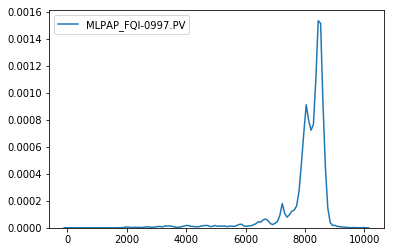

In [54]:
import seaborn as sns
y_name = 'MLPAP_FQI-0997.PV'#粗PA出料量
SPEC_MAX = 10000
SPEC_MIN = 0
condition = (SPEC_MIN<df[y_name])&(df[y_name]<SPEC_MAX)
#根據合理範圍篩選資料
df = df[condition]
#資料統計資訊
print(df[y_name].describe())
#繪圖
sns.kdeplot(df[y_name])

# 業主表示'MLPAP_TRC-0762.PV'有到365以上都是壞掉

In [56]:
print('處理前:',df.shape)
#篩選資料
condition = (df['MLPAP_TRC-0762.PV'] < 365)
df = df[condition]
print('處理後:',df.shape)

處理前: (45591, 67)
處理後: (44680, 67)


# 其他溫度欄位SPEC是340到450

In [58]:
#找尋溫度欄位,思路是找均值在340~450之間的欄位
T_columns = [] 
for c in list(df.columns):
  m = df[c].mean()
  if(340<m)&(m<450):
    print('欄位名稱:{} 數值均值:{}'.format(c,m))
    T_columns.append(c)
print('以上溫度欄位共有{}個'.format(len(T_columns)))

欄位名稱:MLPAP_TI-0706B02 數值均值:400.0
欄位名稱:MLPAP_TI-0706B03 數值均值:397.52517905102957
欄位名稱:MLPAP_TI-0706B04 數值均值:402.21072068039393
欄位名稱:MLPAP_TI-0706B05 數值均值:407.70931065353625
欄位名稱:MLPAP_TI-0706B06 數值均值:403.0975380483438
欄位名稱:MLPAP_TI-0706B07 數值均值:403.08113249776187
欄位名稱:MLPAP_TI-0706B08 數值均值:401.59514324082363
欄位名稱:MLPAP_TI-0706B09 數值均值:401.2958146821844
欄位名稱:MLPAP_TI-0706B10 數值均值:398.1996866606983
欄位名稱:MLPAP_TI-0706B11 數值均值:392.79693375111907
欄位名稱:MLPAP_TI-0706B12 數值均值:388.1617278424351
欄位名稱:MLPAP_TI-0706B13 數值均值:385.7139883616831
欄位名稱:MLPAP_TI-0706B14 數值均值:391.6541629364369
欄位名稱:MLPAP_TI-0706B16 數值均值:389.33272157564903
欄位名稱:MLPAP_TI-0706B17 數值均值:384.8984333034915
欄位名稱:MLPAP_TI-0706B18 數值均值:380.05179051029546
欄位名稱:MLPAP_TI-0706B19 數值均值:376.91978513876455
欄位名稱:MLPAP_TI-0706B20 數值均值:371.84066696508506
欄位名稱:MLPAP_TI-0706B21 數值均值:375.9692703670546
欄位名稱:MLPAP_TI-0706B22 數值均值:379.330102954342
欄位名稱:MLPAP_TI-0706B23 數值均值:375.950872873769
欄位名稱:MLPAP_TI-0706B24 數值均值:371.84321844225605
欄位名稱:MLPAP_TJ

In [59]:
print('處理前:',df.shape)
#遍歷溫度欄位篩選合理範圍資料
for c in T_columns:
  condition = (340<df[c])&(df[c]<450)
  df = df[condition]
print('處理後:',df.shape)

處理前: (44680, 67)
處理後: (37638, 67)


# 新增單耗(target)

In [0]:
df['target'] = df['MLPAP_FQI-0997.PV'] / df['MLPAP_FQ-0619.PV'] #粗PA出料量 / OX入料量 一種評估生產效率的指標

# 業主表示單耗範圍應該再0~2之間

處理前: (37638, 68)
處理後: (37627, 68)
count    37627.000000
mean         1.101850
std          0.035027
min          0.004907
25%          1.093211
50%          1.103460
75%          1.113161
max          1.834222
Name: target, dtype: float64


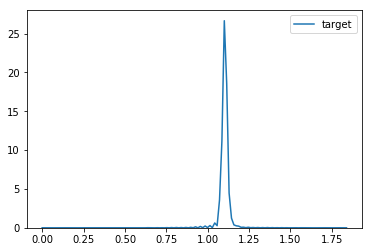

In [62]:
print('處理前:',df.shape)
condition = (df['target']>0)&(df['target']<=2)
#篩選
df = df[condition]
print('處理後:',df.shape)
sns.kdeplot(df['target'])
print(df['target'].describe())

# 刪除粗PA出料量&入料量(預測target不能用到這個欄位)

In [63]:
print('處理前:',df.shape)
df = df.drop('MLPAP_FQI-0997.PV',axis=1)#出料量
df = df.drop('MLPAP_FQ-0619.PV',axis=1)#入料量
print('處理後:',df.shape)

處理前: (37627, 68)
處理後: (37627, 66)


# 刪除後來才加裝的兩個(因為後來才加裝欄位缺失太多)

In [64]:
print('處理前:',df.shape)
df = df.dropna(axis=1)#因為axis=1所以只有那兩欄位會被刪除
print('處理後:',df.shape)

處理前: (37627, 66)
處理後: (37627, 64)


# train test切分

In [65]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df ,test_size=0.2, random_state=42)
print('訓練資料',df_train.shape)
print('測試資料',df_test.shape)

訓練資料 (30101, 64)
測試資料 (7526, 64)


# StandardScaler

In [76]:
from sklearn.preprocessing import StandardScaler
#建立縮放器
ss = StandardScaler()
ss.fit(df_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
#執行縮放轉換
df_train_ss = ss.transform(df_train)
df_test_ss = ss.transform(df_test)
#轉換回dataframe
df_train_ss = pd.DataFrame(df_train_ss,index = df_train.index,columns = df_train.columns)
df_test_ss =  pd.DataFrame(df_test_ss,index = df_test.index,columns = df_test.columns)

In [0]:
#y不用特徵縮放
df_train_ss['target'] = df_train['target']
df_test_ss['target'] = df_test['target']

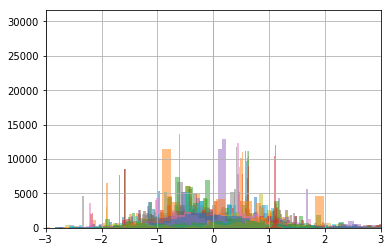

In [80]:
#繪圖
import matplotlib.pyplot as plt
for col in df_train_ss.columns:
  df_train_ss[col].hist(bins=100,alpha=0.5)
plt.xlim(-3,3)
plt.show()

# 建模資料準備

In [0]:
#X
X_train = df_train_ss.drop('target',axis=1)
X_test = df_test_ss.drop('target',axis=1)
#y
y_train = df_train_ss['target']
y_test = df_test_ss['target']

# 評估function

In [0]:
import numpy as np
def rmse(y_test,y_pred):
    return np.sqrt(((y_pred - y_test) ** 2).mean())
def mape(y_true, y_pred):   
    n = len(y_true)
    mape = sum(np.abs((y_true - y_pred)/y_true))/n*100
    return mape

# 中英對照表

In [83]:
tag盤點表 = pd.read_excel('/content/drive/My Drive/南亞PA廠/tag盤點表_新.xlsx')
tag盤點表.head()

,item,TAG,chinese,character,unit,category,period,min,max,推測顯著性(依製程經驗)
0,1,MLPAP_TJC-0627.PV,OX預熱器出口溫度,溫度,℃,可控制因子,1分鐘2筆,140,160,***
1,2,MLPAP_TRC-0610.PV,空氣預熱器出口溫度,溫度,℃,可控制因子,1分鐘2筆,160,200,***
2,3,MLPAP_FR-0632.PV,汽機風量,流量,KNM3/HR,可控制因子,1分鐘2筆,30,90,****
3,4,MLPAP_FQ-0619.PV,OX入料量,流量,kg/HR,可控制因子,1分鐘2筆,2000,8000,****
4,5,MLPAP_TIC-0757A.PV,反應槽鹽浴溫度,溫度,℃,可控制因子,1分鐘2筆,345,365,****


# ridge建模

In [86]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
rr = Ridge(alpha=1.0)#默認值 
rr.fit(X_train, y_train)
y_pred = pd.Series(rr.predict(X_test),index=y_test.index,name='y_pred')

#model score
R2 = r2_score(y_test,y_pred)
RMSE = rmse(y_test,y_pred)
MAPE = mape(y_test,y_pred)
print('R2:{}\nRMSE:{}\nMAPE:{}'.format(R2,RMSE,MAPE))

#coef
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
result = pd.DataFrame(dict(zip(X_train.columns,rr.coef_)),index=['coef']).T.sort_values(by='coef',ascending=False)
result['chinese'] = result.index.map(dict(zip(tag盤點表['TAG'],tag盤點表['chinese'])))
result = result[['chinese','coef']]
result

R2:0.0973042748506624
RMSE:0.033295574570099046
MAPE:1.40864199285782


,chinese,coef
MLPAP_TJR-0720A1.PV,鹽浴溫度,0.017515
MLPAP_TI-0706B04,反應槽溫度_多點式(高度 450),0.017106
MLPAP_TI-0706B11,反應槽溫度_多點式(高度 1150),0.014494
MLPAP_TI-0706B18,反應槽溫度_多點式(高度 1850),0.013160
MLPAP_TI-0706B23,反應槽溫度_多點式(高度 2350),0.013142
MLPAP_TI-0706B12,反應槽溫度_多點式(高度 1250),0.012977
MLPAP_TI-0716B01,反應槽觸媒溫度_高度(700),0.010522
MLPAP_TI-0706B17,反應槽溫度_多點式(高度 1750),0.010513
MLPAP_TI-0706B03,反應槽溫度_多點式(高度 350),0.008129
MLPAP_TI-0706B16,反應槽溫度_多點式(高度 1650),0.007675


# ridge預測評估

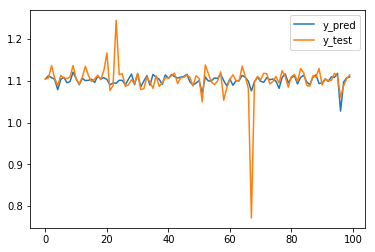

In [87]:
y_pred = rr.predict(X_test)
plt.plot(y_pred[:100],label='y_pred')
plt.plot(y_test.values[:100],label='y_test')
plt.legend()
plt.show()

# Lasso建模

In [96]:
from sklearn.linear_model import Lasso
la = Lasso(0.001)#默認值為1,因為coef找出來都是0所以調低成0.001
la.fit(X_train, y_train)
y_pred = pd.Series(la.predict(X_test),index=y_test.index,name='y_pred')

#model score
R2 = r2_score(y_test,y_pred)
RMSE = rmse(y_test,y_pred)
MAPE = mape(y_test,y_pred)
print('R2:{}\nRMSE:{}\nMAPE:{}'.format(R2,RMSE,MAPE))

#coef
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
result = pd.DataFrame(dict(zip(X_train.columns,la.coef_)),index=['coef']).T.sort_values(by='coef',ascending=False)
result['chinese'] = result.index.map(dict(zip(tag盤點表['TAG'],tag盤點表['chinese'])))
result = result[['chinese','coef']]
result

R2:0.0695023849958557
RMSE:0.03380441720544932
MAPE:1.4526361432990418


,chinese,coef
MLPAP_TI-0706B09,反應槽溫度_多點式(高度 950),0.004321
MLPAP_TI-0706B23,反應槽溫度_多點式(高度 2350),0.003419
MLPAP_TJR-0762A1.PV,鹽浴溫度,0.001428
MLPAP_TI-0706B11,反應槽溫度_多點式(高度 1150),0.000999
MLPAP_TJR-0720A1.PV,鹽浴溫度,0.000837
MLPAP_FR-0791.PV,反應槽50K蒸氣輸出,0.000677
MLPAP_TI-0716A01,反應槽觸媒溫度(CL1)_高度(1160),0.000389
MLPAP_TRC-1734.PV,轉換式冷凝器熱油溫度,0.000270
MLPAP_TI-0706B10,反應槽溫度_多點式(高度 1050),0.000091
MLPAP_TI-0706B01,反應槽觸媒溫度_高度(2865),0.000000


# Lasso預測評估

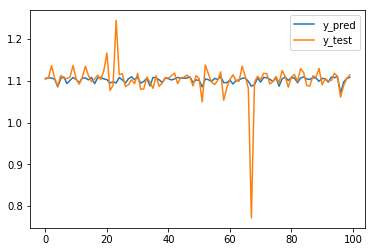

In [105]:
y_pred = la.predict(X_test)
plt.plot(y_pred[:100],label='y_pred')
plt.plot(y_test.values[:100],label='y_test')
plt.legend()
plt.show()

# xgboost建模

In [112]:
from xgboost import XGBRegressor
xgb = XGBRegressor(objective ='reg:squarederror') 
xgb.fit(X_train, y_train)
y_pred = pd.Series(xgb.predict(X_test),index=y_test.index,name='y_pred')

#model score
R2 = r2_score(y_test,y_pred)
RMSE = rmse(y_test,y_pred)
MAPE = mape(y_test,y_pred)
print('R2:{}\nRMSE:{}\nMAPE:{}'.format(R2,RMSE,MAPE))

#特徵重要度
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
result = pd.DataFrame(dict(zip(X_train.columns,xgb.feature_importances_)),index=['feature_importances']).T.sort_values(by='feature_importances',ascending=False)
result['chinese'] = result.index.map(dict(zip(tag盤點表['TAG'],tag盤點表['chinese'])))
result = result[['chinese','feature_importances']]
result.head(10)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


R2:0.24894611584221638
RMSE:0.030370459942110576
MAPE:1.2871269559457437


,chinese,feature_importances
MLPAP_TI-0706B09,反應槽溫度_多點式(高度 950),0.097096
MLPAP_TI-0706B22,反應槽溫度_多點式(高度 2250),0.073372
MLPAP_TI-0706B10,反應槽溫度_多點式(高度 1050),0.032745
MLPAP_TI-0716D01,反應槽觸媒溫度_高度(1650),0.032503
MLPAP_TJR-0762A1.PV,鹽浴溫度,0.031447
MLPAP_TI-0706D01,反應槽觸媒溫度_高度(2230),0.031166
MLPAP_PIC-0761.PV,鹽浴冷卻器(E112)出口壓力,0.030016
MLPAP_TJR-0721.PV,反應槽出口溫度,0.029995
MLPAP_TJR-0720B2.PV,鹽浴溫度,0.029011
MLPAP_TJC-0627.PV,OX預熱器出口溫度,0.028190


# xgboost預測評估

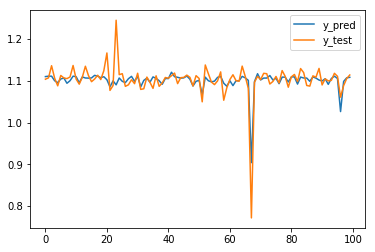

In [113]:
y_pred = xgb.predict(X_test)
plt.plot(y_pred[:100],label='y_pred')
plt.plot(y_test.values[:100],label='y_test')
plt.legend()
plt.show()

# 篩選反應槽溫度欄位(上面篩出來很多都是反應槽溫度)

In [114]:
ind = []
for i in result.index:
  data = result.loc[i,:]
  if '反應槽溫度' in data['chinese']:
    ind.append(i)
反應槽溫度欄位 = result.loc[ind,:].index.tolist()
print('反應槽溫度欄位數量:',len(反應槽溫度欄位))
result.loc[ind,:].head(3)

反應槽溫度欄位數量: 23


,chinese,feature_importances
MLPAP_TI-0706B09,反應槽溫度_多點式(高度 950),0.097096
MLPAP_TI-0706B22,反應槽溫度_多點式(高度 2250),0.073372
MLPAP_TI-0706B10,反應槽溫度_多點式(高度 1050),0.032745


# 篩選反應槽觸媒溫度欄位

In [115]:
ind = []
for i in result.index:
  data = result.loc[i,:]
  if '反應槽觸媒溫度' in data['chinese']:
    ind.append(i)
反應槽觸媒溫度欄位 = result.loc[ind,:].index.tolist()
print('反應槽觸媒溫度欄位數量:',len(反應槽觸媒溫度欄位))
result.loc[ind,:].head(3)

反應槽觸媒溫度欄位數量: 12


,chinese,feature_importances
MLPAP_TI-0716D01,反應槽觸媒溫度_高度(1650),0.032503
MLPAP_TI-0706D01,反應槽觸媒溫度_高度(2230),0.031166
MLPAP_TI-0706A02,反應槽觸媒溫度_高度(1010),0.020667


# 檢查取樣頻率

In [116]:
取樣頻率 = []
for 當下INDEX,下一筆INDEX in zip( df.index ,df.index[1:]):
  取樣頻率.append(下一筆INDEX - 當下INDEX)
pd.Series(取樣頻率).value_counts()

0 days 00:30:00      37570
0 days 01:00:00         16
0 days 01:30:00          4
0 days 02:00:00          4
0 days 02:30:00          3
1 days 00:00:00          2
0 days 10:00:00          2
0 days 03:00:00          2
0 days 13:30:00          2
0 days 05:00:00          1
0 days 11:30:00          1
9 days 10:00:00          1
0 days 22:30:00          1
0 days 13:00:00          1
89 days 17:30:00         1
1 days 16:00:00          1
0 days 14:30:00          1
14 days 14:00:00         1
0 days 07:00:00          1
7 days 05:30:00          1
1 days 00:30:00          1
0 days 04:00:00          1
0 days 18:30:00          1
0 days 12:00:00          1
0 days 20:00:00          1
147 days 03:30:00        1
48 days 06:00:00         1
0 days 15:30:00          1
1 days 09:30:00          1
9 days 13:30:00          1
dtype: int64

# 正常一筆資料的index和下一筆資料的index應該間隔30分

In [119]:
import datetime

觀察時間們 = []
觀察時間 = []
'''
解決方法:只選取連續時間段,每個連續時間段裡面資料都是正常連續的
觀察時間們 = ['觀察時間1(連續)','觀察時間2(連續)','觀察時間3(連續)'.....]
'''

for i,i_next in zip(df.index,df.index[1:]):
  #若跟下一筆資料之間隔為30分鐘,則加入index
  if (i_next - i) == datetime.timedelta(minutes = 30):
    觀察時間.append((i))
    continue
  #若跟下一筆資料之間隔超過30分鐘
  觀察時間們.append(觀察時間)
  觀察時間 = []
print('整理出 {} 個時間段資料是連續的'.format(len(觀察時間們)))

整理出 56 個時間段資料是連續的


# 再從這些時間段裡面挑選出資料數超過500筆的

In [123]:
sub_dfs = []
for 觀察時間 in 觀察時間們:
  if len(觀察時間)>500:
    sub_dfs.append(df.loc[觀察時間])
print('篩選出 {} 個時間段資料數超過 500 筆'.format(len(sub_dfs)))

篩選出 25 個時間段資料數超過 500 筆


# 看看取樣頻率正常的資料們

In [125]:
for sub_df in sub_dfs:
  print('資料數:{} 起始日期:{} 結束日期:{}'.format(len(sub_df),sub_df.index[0],sub_df.index[-1]))

資料數:1920 起始日期:2016-06-05 14:30:00 結束日期:2016-07-15 14:00:00
資料數:1789 起始日期:2016-07-16 02:30:00 結束日期:2016-08-22 08:30:00
資料數:1311 起始日期:2016-08-31 19:00:00 結束日期:2016-09-28 02:00:00
資料數:2971 起始日期:2016-09-29 18:30:00 結束日期:2016-11-30 15:30:00
資料數:749 起始日期:2016-11-30 17:00:00 結束日期:2016-12-16 07:00:00
資料數:1650 起始日期:2016-12-16 08:30:00 結束日期:2017-01-19 17:00:00
資料數:1888 起始日期:2017-03-16 02:00:00 結束日期:2017-04-24 09:30:00
資料數:1081 起始日期:2017-04-25 01:30:00 結束日期:2017-05-17 13:30:00
資料數:914 起始日期:2017-06-13 18:00:00 結束日期:2017-07-02 18:30:00
資料數:546 起始日期:2017-07-08 19:00:00 結束日期:2017-07-20 03:30:00
資料數:601 起始日期:2017-07-24 20:00:00 結束日期:2017-08-06 08:00:00
資料數:1211 起始日期:2017-08-07 09:00:00 結束日期:2017-09-01 14:00:00
資料數:952 起始日期:2017-09-01 17:00:00 結束日期:2017-09-21 12:30:00
資料數:1870 起始日期:2017-09-21 14:00:00 結束日期:2017-10-30 12:30:00
資料數:917 起始日期:2017-11-08 08:30:00 結束日期:2017-11-27 10:30:00
資料數:1000 起始日期:2017-11-27 15:00:00 結束日期:2017-12-18 10:30:00
資料數:2367 起始日期:2018-05-19 09:00:00 結束日期:2018-07-07 16:00:00
資料數

# 畫出單耗與xgboost前3重要特徵之線圖

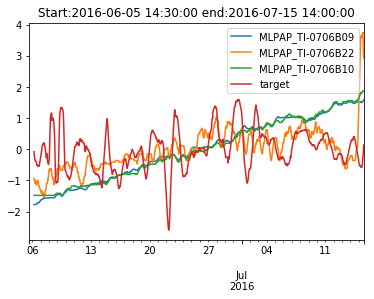

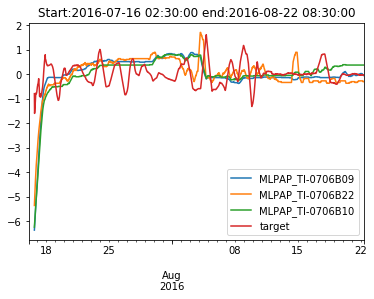

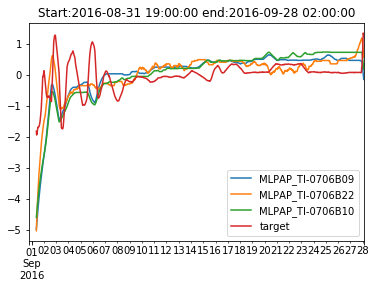

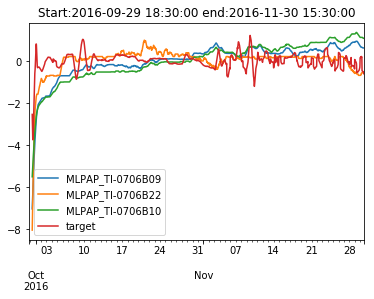

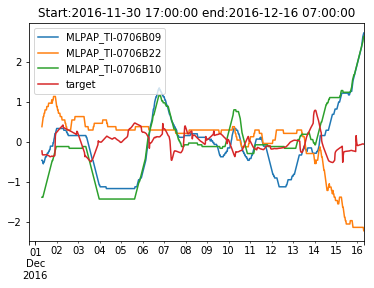

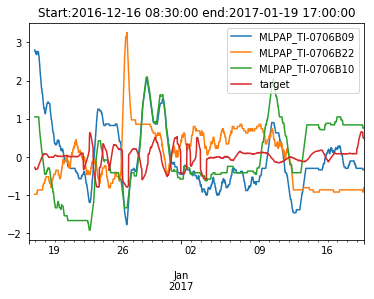

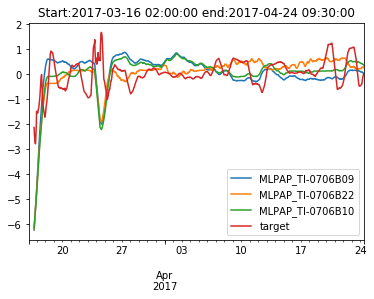

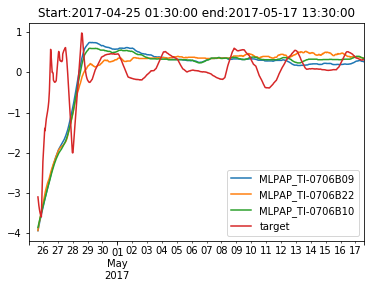

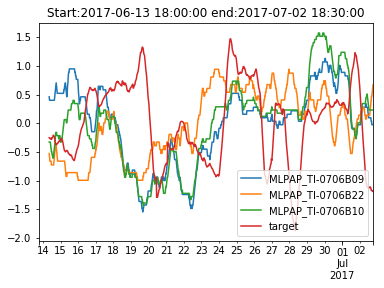

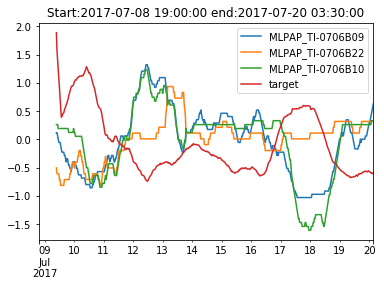

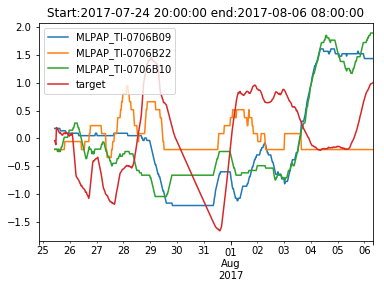

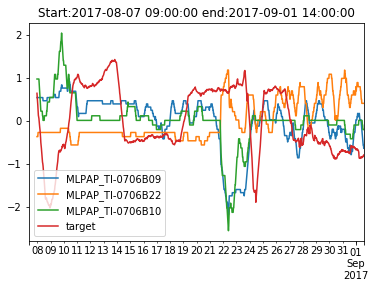

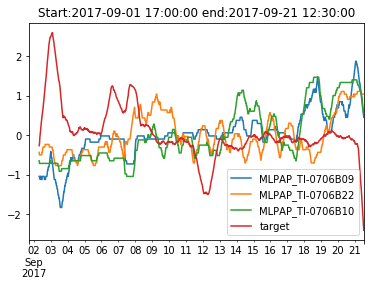

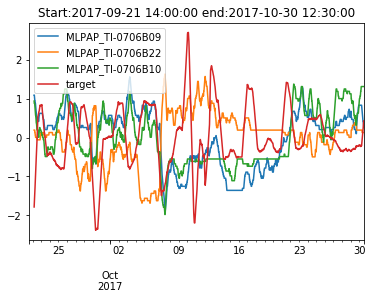

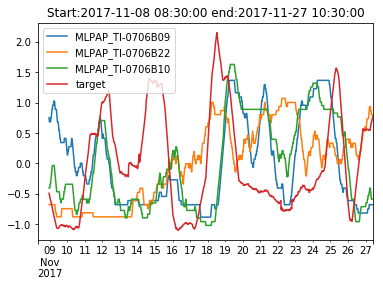

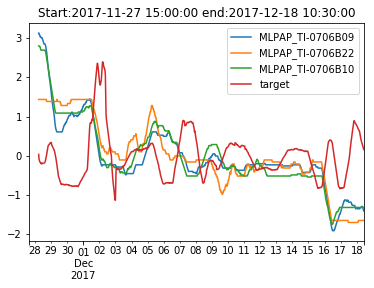

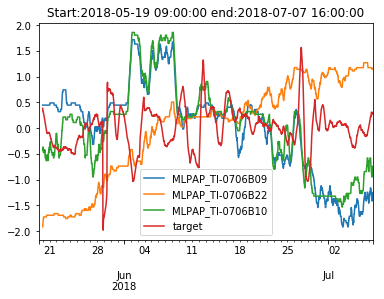

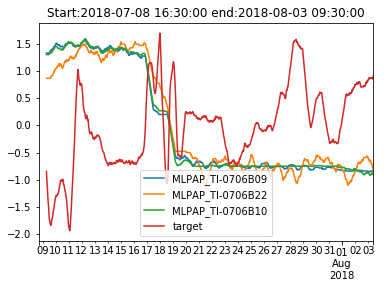

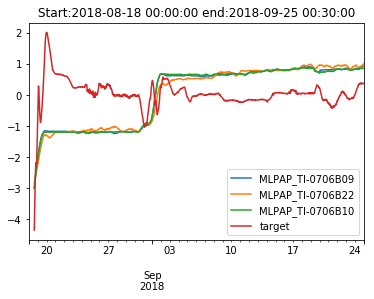

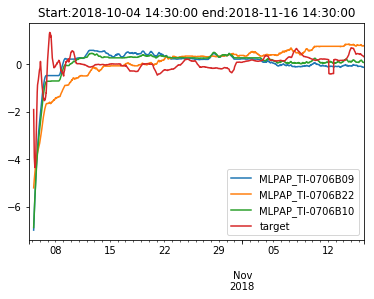

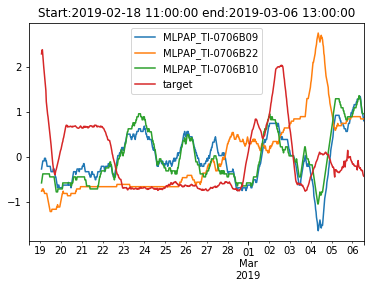

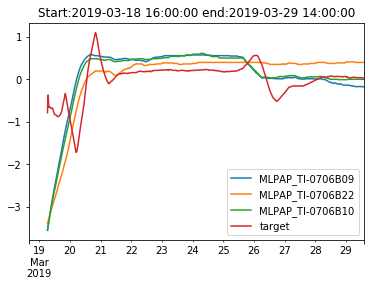

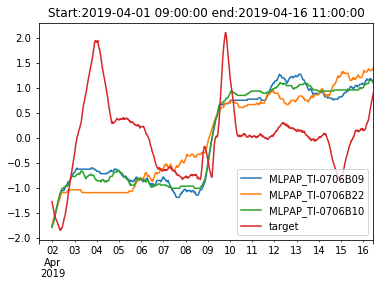

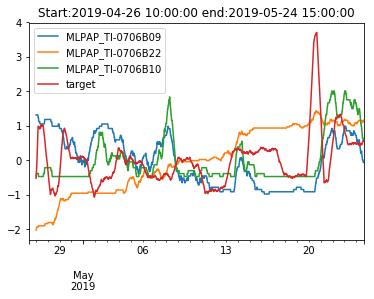

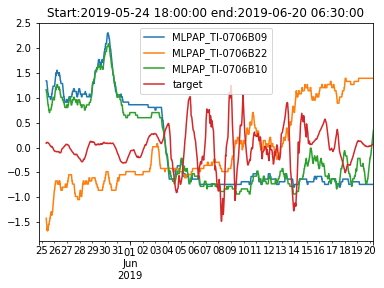

In [134]:
from sklearn.preprocessing import StandardScaler
for data in sub_dfs:
  #特徵縮放
  scaler = StandardScaler()
  data_mm = pd.DataFrame(scaler.fit_transform(data),index=data.index,columns=data.columns)
  #繪製重要特徵和y的平滑線
  data_mm[list(result.index[:3])+['target']].rolling(30).mean().plot()
  #title
  T = 'Start:{} end:{}'.format(data.index[0],data.index[-1])
  plt.title(T)
  plt.show()

# 看看反應槽溫度,反應槽觸媒溫度 跟單耗的線圖

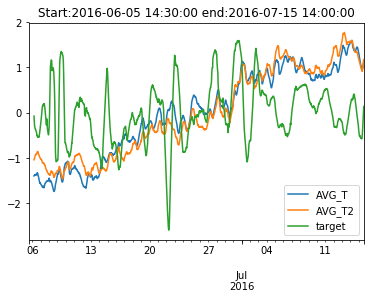

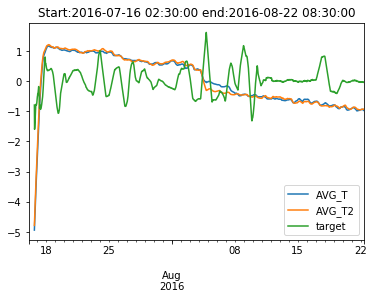

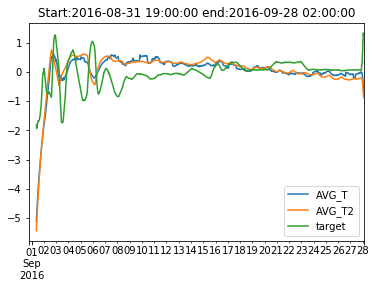

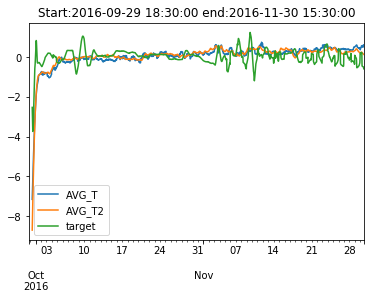

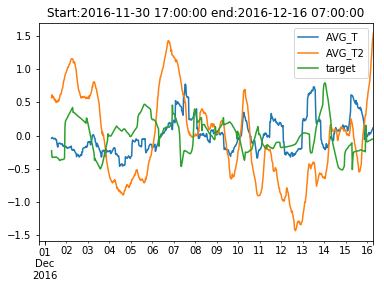

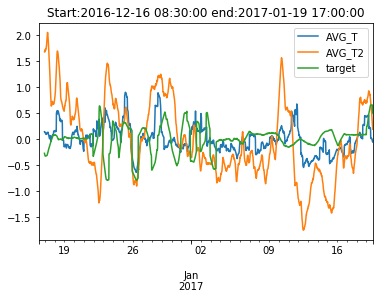

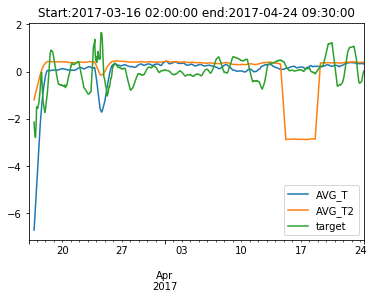

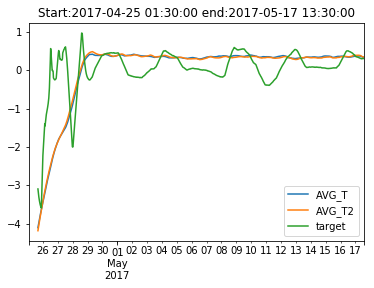

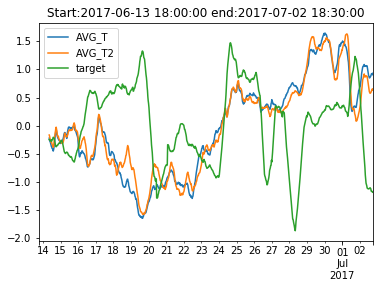

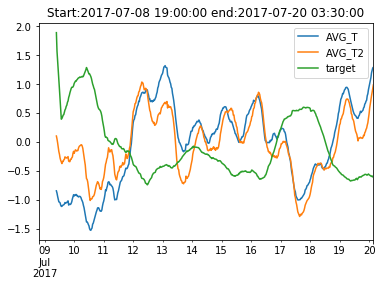

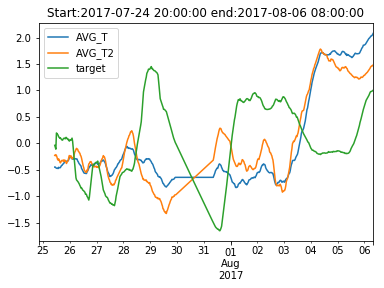

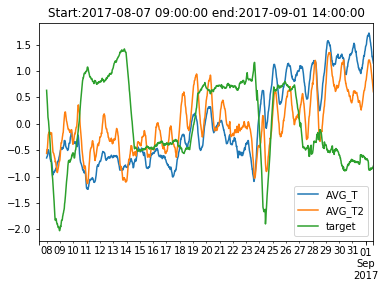

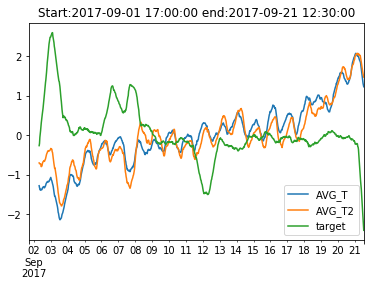

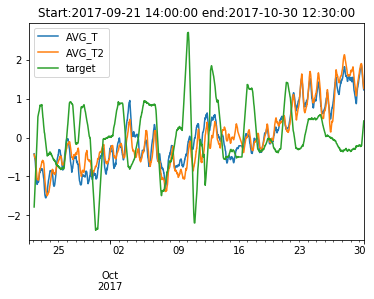

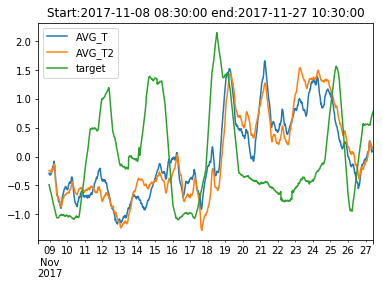

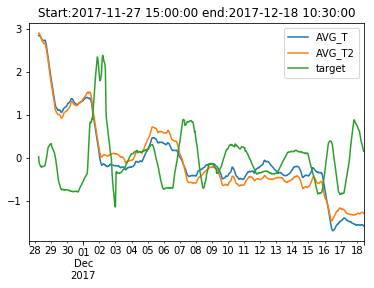

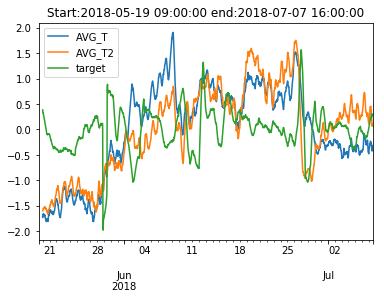

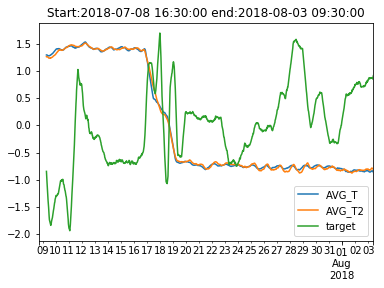

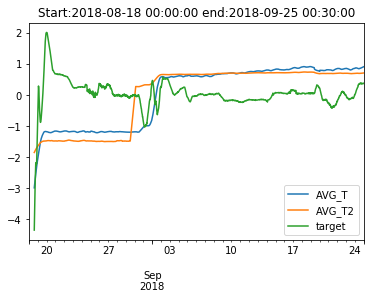

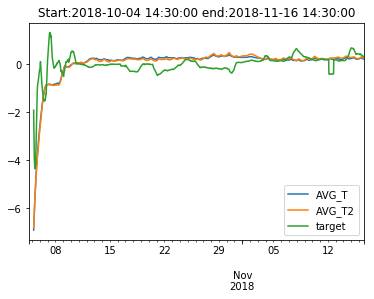

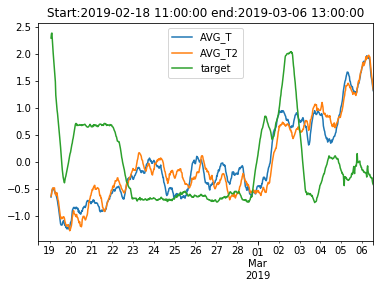

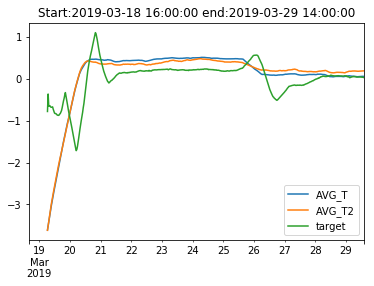

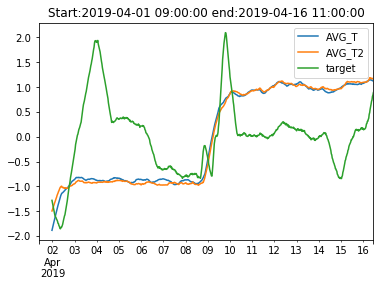

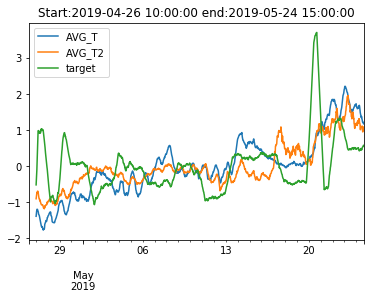

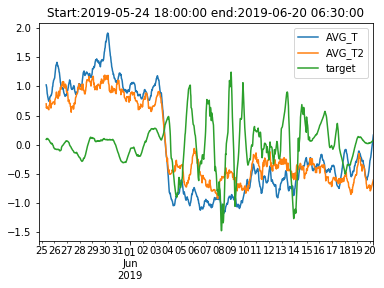

In [135]:
from sklearn.preprocessing import StandardScaler
for data in sub_dfs:
  #創建兩個新欄位
  data['AVG_T'] = data[反應槽溫度欄位].mean(axis=1)
  data['AVG_T2'] = data[反應槽觸媒溫度欄位].mean(axis=1)
  
  #對數據做特徵縮放
  scaler = StandardScaler()
  data_mm = pd.DataFrame(scaler.fit_transform(data),index=data.index,columns=data.columns)
  
  #線圖平滑方便觀察
  data_mm[['AVG_T']+['AVG_T2']+['target']].rolling(30).mean().plot()
  
  #title打上起始和結束時間
  T = 'Start:{} end:{}'.format(data.index[0],data.index[-1])
  plt.title(T)
  plt.show()

In [0]:
#X = data_mm[['AVG_T','AVG_T2']]
X = data_mm.drop('target',axis=1)
y = data_mm['target']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 用溫度欄位來做預測

In [142]:
from xgboost import XGBRegressor
xgb = XGBRegressor() 
xgb.fit(X_train, y_train)
y_pred = pd.Series(xgb.predict(X_test),index=y_test.index,name='y_pred')

R2 = r2_score(y_test,y_pred)
RMSE = rmse(y_test,y_pred)
MAPE = mape(y_test,y_pred)
print('R2:{}\nRMSE:{}\nMAPE:{}'.format(R2,RMSE,MAPE))

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
result = pd.DataFrame(dict(zip(X_train.columns,xgb.feature_importances_)),index=['feature_importances']).T.sort_values(by='feature_importances',ascending=False)
result['chinese'] = result.index.map(dict(zip(tag盤點表['TAG'],tag盤點表['chinese'])))
result = result[['chinese','feature_importances']]
result

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:22:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2:-0.06603042429327699
RMSE:0.9275882300977859
MAPE:324.0441153478635


,chinese,feature_importances
MLPAP_FR-0755.PV,反應槽16K蒸氣輸出,0.056379
MLPAP_TI-0716E01,反應槽觸媒溫度(CL0)_高度(550),0.052265
DATA OF USE,觸媒使用時間,0.037647
MLPAP_TJC-0627.PV,OX預熱器出口溫度,0.037637
MLPAP_TJR-0762B2.PV,鹽浴溫度,0.037356
AVG_T2,NaN,0.034560
MLPAP_TJR-0762A2.PV,鹽浴溫度,0.034138
MLPAP_TI-0716A01,反應槽觸媒溫度(CL1)_高度(1160),0.033408
MLPAP_TI-0716C01,反應槽觸媒溫度_高度(2715),0.033032
AVG_T,NaN,0.032325
